# Titanic Outcompte
$Fonte:$ https://www.youtube.com/watch?v=j4XvJEbaVJg

## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train_df = pd.read_csv("train.csv", sep=",")
test_df = pd.read_csv("test.csv", sep=",")

In [3]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

## Analise da Base

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


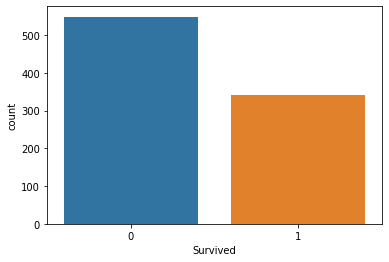

In [5]:
sns.countplot(x='Survived', data=train_df);

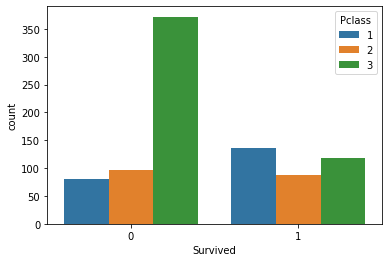

In [6]:
sns.countplot(x='Survived', data=train_df, hue="Pclass")

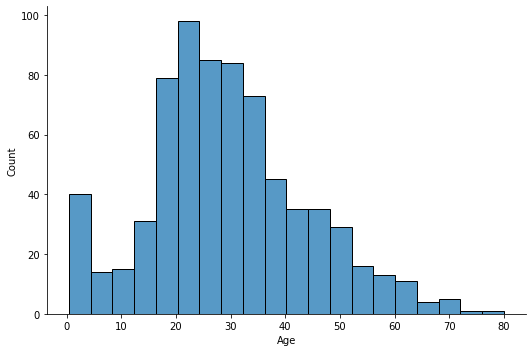

In [12]:
sns.displot(train_df['Age'],kde= False, aspect=1.5)

## Trantando Missing

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

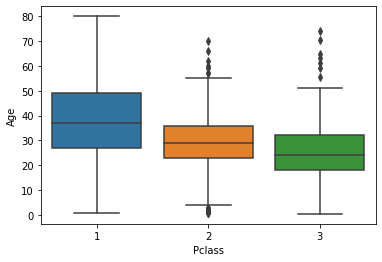

In [10]:
sns.boxplot(x="Pclass", y="Age", data=train_df)

### Completando feature "Age"
Usando a média das idades por tipo de classe

In [16]:
print(train_df[train_df['Pclass']==1]['Age'].mean())
print(train_df[train_df['Pclass']==2]['Age'].mean())
print(train_df[train_df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [34]:
mean_age_pcla1 = round(train_df[train_df['Pclass']==1]['Age'].mean())
mean_age_pcla2 = round(train_df[train_df['Pclass']==2]['Age'].mean())
mean_age_pcla3 = round(train_df[train_df['Pclass']==3]['Age'].mean())

In [56]:
age = train_df[train_df['Pclass']==2]['Age']

In [59]:
age.fillna(mean_age_pcla1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [60]:
age

9      14.0
15     55.0
17     38.0
20     35.0
21     34.0
       ... 
866    27.0
874    28.0
880    25.0
883    28.0
886    27.0
Name: Age, Length: 184, dtype: float64

In [61]:
train_df[train_df['Pclass']==2]['Age'] = age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
age = train_df[train_df['Pclass']==2]['Age']

In [62]:
train_df[train_df['Pclass']==1]['Age'].isnull().sum()

30

In [64]:
age

9      14.0
15     55.0
17      NaN
20     35.0
21     34.0
       ... 
866    27.0
874    28.0
880    25.0
883    28.0
886    27.0
Name: Age, Length: 184, dtype: float64

In [37]:
train_df[train_df['Pclass']==2]['Age'] = mean_age_pcla2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
train_df[train_df['Pclass']==3]['Age'] = mean_age_pcla3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64